# Netflix Data Analysis

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Mahesh\Downloads\Unified Mentor\Datasets\netflix1.csv")

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
for i in df.columns:
    print(i,df[i].unique())
    print('*******','\n')

show_id ['s1' 's3' 's6' ... 's8801' 's8784' 's8786']
******* 

type ['Movie' 'TV Show']
******* 

title ['Dick Johnson Is Dead' 'Ganglands' 'Midnight Mass' ...
 'Zindagi Gulzar Hai' 'Yoko' 'YOM']
******* 

director ['Kirsten Johnson' 'Julien Leclercq' 'Mike Flanagan' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
******* 

country ['United States' 'France' 'Brazil' 'United Kingdom' 'India' 'Germany'
 'Pakistan' 'Not Given' 'China' 'South Africa' 'Japan' 'Nigeria' 'Spain'
 'Philippines' 'Australia' 'Argentina' 'Canada' 'Hong Kong' 'Italy'
 'New Zealand' 'Egypt' 'Colombia' 'Mexico' 'Belgium' 'Switzerland'
 'Taiwan' 'Bulgaria' 'Poland' 'South Korea' 'Saudi Arabia' 'Thailand'
 'Indonesia' 'Kuwait' 'Malaysia' 'Vietnam' 'Lebanon' 'Romania' 'Syria'
 'United Arab Emirates' 'Sweden' 'Mauritius' 'Austria' 'Turkey'
 'Czech Republic' 'Cameroon' 'Netherlands' 'Ireland' 'Russia' 'Kenya'
 'Chile' 'Uruguay' 'Bangladesh' 'Portugal' 'Hungary' 'Norway' 'Singapore'
 'Iceland' 'Serbia' 'Namibia' 'Per

In [6]:
#checking nulls
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
#checking and dropping duplicates
df.duplicated().sum()

0

The date-added columns represents the date but it is in object data type. so we will change that to the datetime.

In [8]:
#convert the date-added to datetime
df['date_added']=pd.to_datetime(df['date_added'])

In [9]:
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


## EDA

### 1. Content type distribution 

In [10]:
# count the number of movies and tV shows
type_counts=df['type'].value_counts()
type_counts

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Text(0, 0.5, 'Count')

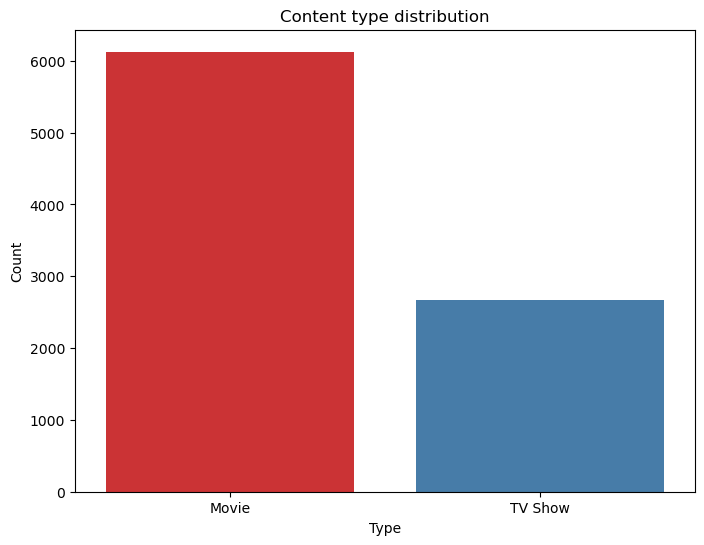

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index, y=type_counts.values,palette='Set1')
plt.title('Content type distribution')
plt.xlabel('Type')
plt.ylabel('Count')

### 2. Most common genres

In [12]:
#splitting the listed_in column to count all the genres
df['genres']=df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'],[])
genres_counts = pd.Series(all_genres).value_counts().head(10)

In [13]:
genres_counts

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64

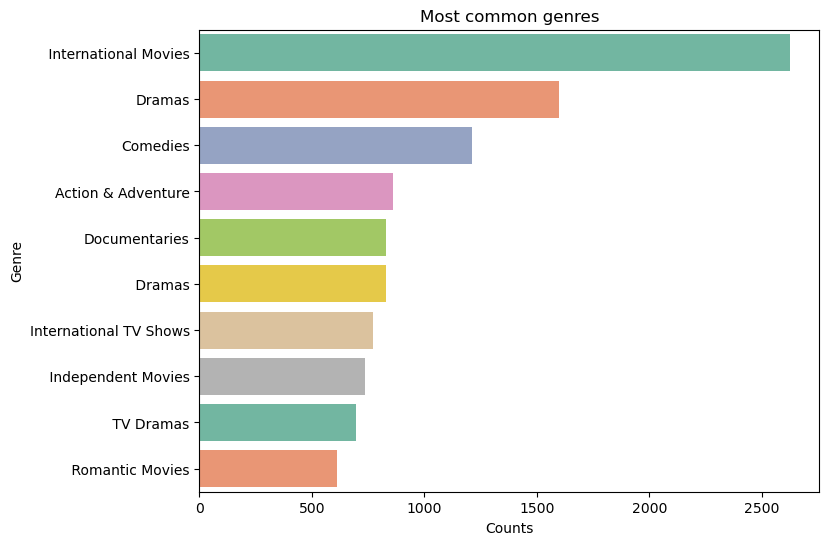

The above are the top 10 common genres seen in netflix


In [14]:
#plot the most common genres
plt.figure(figsize=(8,6))
sns.barplot(y=genres_counts.index, x=genres_counts.values,palette='Set2')
plt.title('Most common genres')
plt.xlabel('Counts')
plt.ylabel('Genre')
plt.show()
print('The above are the top 10 common genres seen in netflix')

### 3. Content added over Time

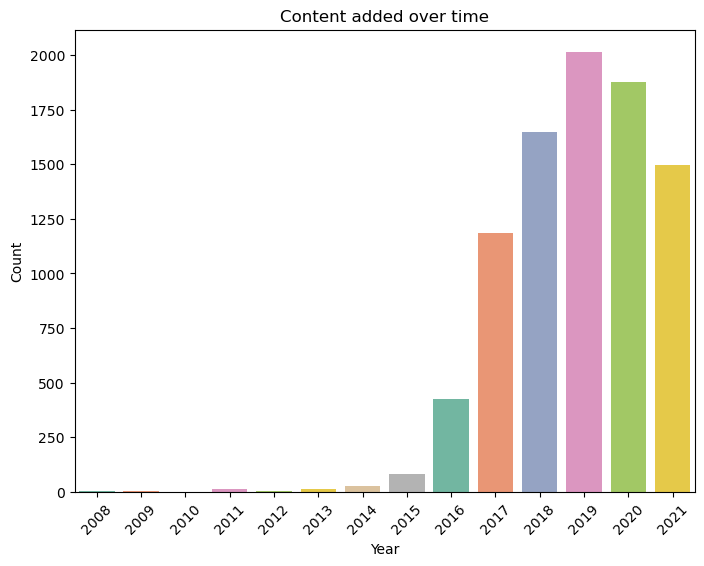

The Above plot shows the content added in the Netflix every year from 2008. And we can see that in year 2019 the count of content added is more.


In [15]:
#Extracting year and month from date_added
df['year_added']= df['date_added'].dt.year
df['month_added']= df['date_added'].dt.month

#plot content added ,over years
plt.figure(figsize=(8,6))
sns.countplot(x='year_added', data=df, palette='Set2')
plt.title('Content added over time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print('The Above plot shows the content added in the Netflix every year from 2008. And we can see that in year 2019 the count of content added is more.')

### 4. Top 10 Directors with the Most titles

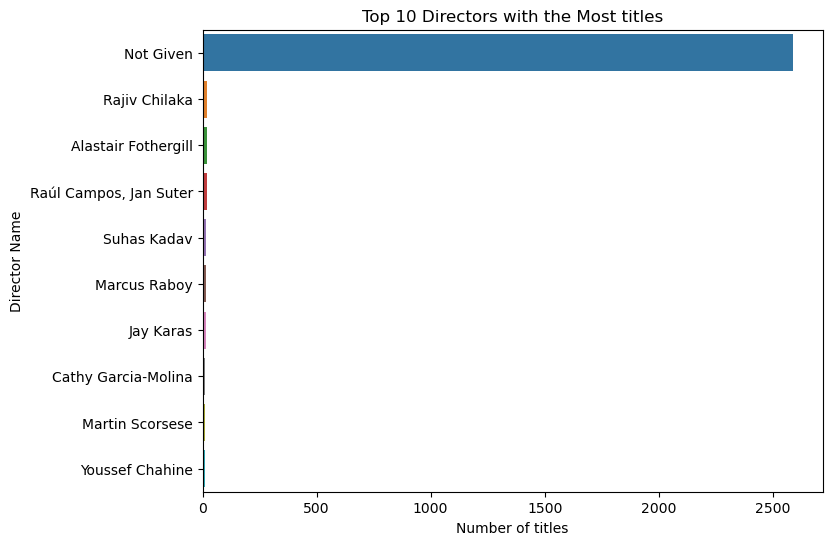

In [16]:
#count titles by director
top_directors = df['director'].value_counts().head(10)

#plot top directors
plt.figure(figsize=(8,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with the Most titles')
plt.xlabel('Number of titles')
plt.ylabel('Director Name')
plt.show()

### 5. Top 10 countries with most content in Netflix 

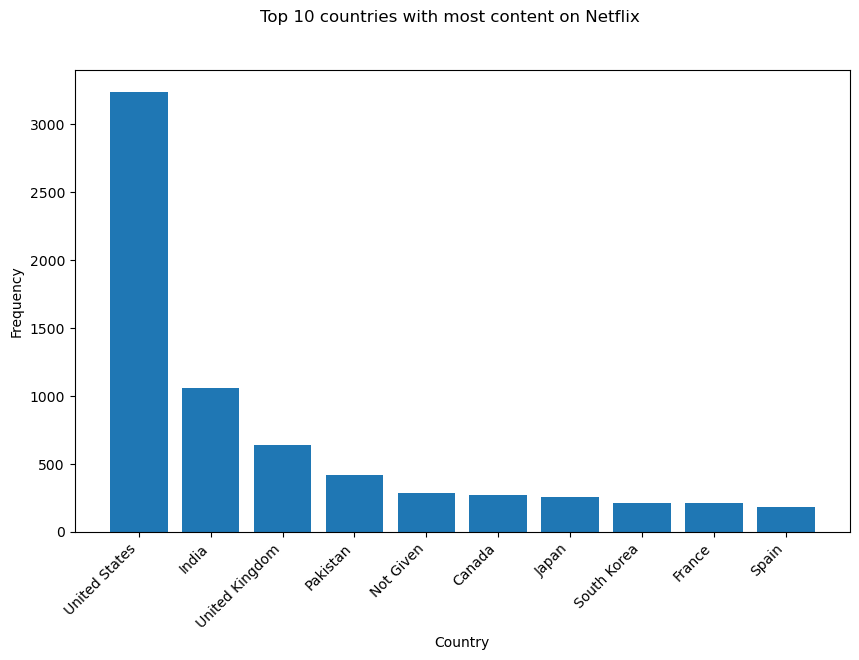

In [17]:
top_ten_countries=df['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

### 6. Monthly releases of Movies and TV shows on Netflix

In [20]:
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day

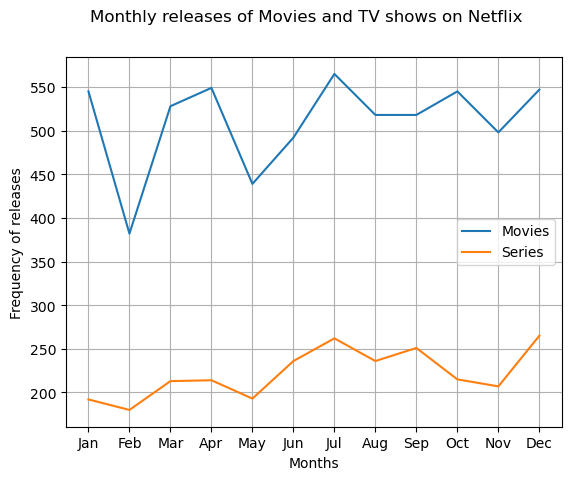

In [23]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month'].value_counts().sort_index()

plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

### 7. Yearly releases of Movies and TV Shows on Netflix

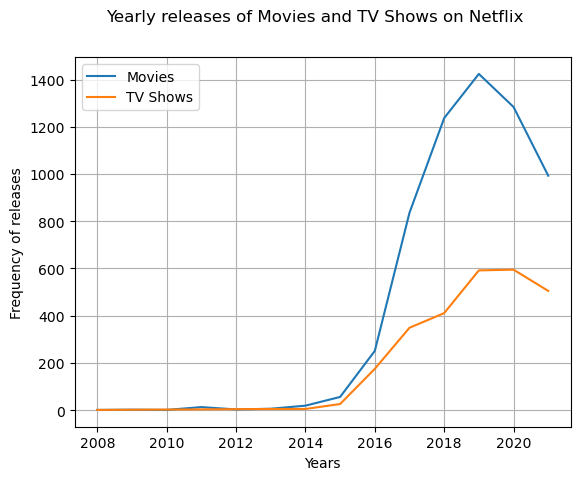

In [25]:
yearly_movie_releases=df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['year'].value_counts().sort_index()

plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()
plt.show()

### 8. Top 10 movie genres

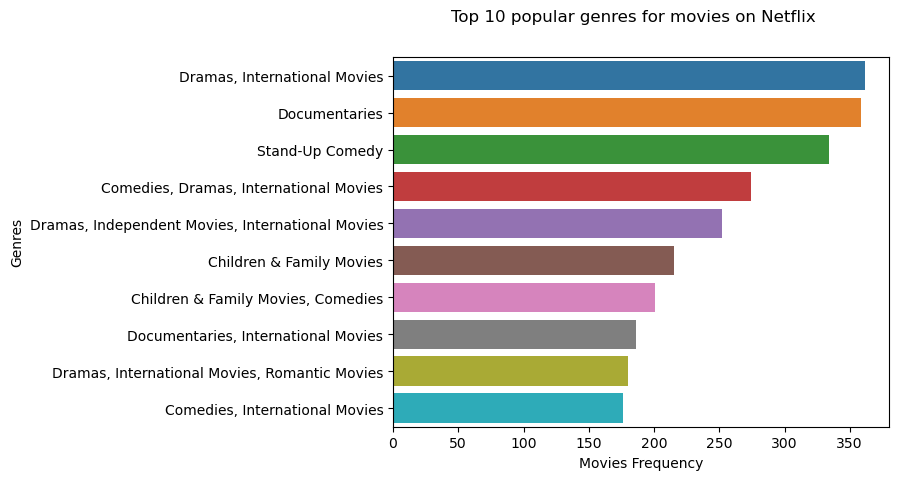

In [31]:
popular_movie_genre=df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=df[df['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]


sns.barplot(x=popular_movie_genre.values, y=popular_movie_genre.index)
plt.ylabel("Genres")
plt.xlabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

### 9. Top 10 TV shows genres

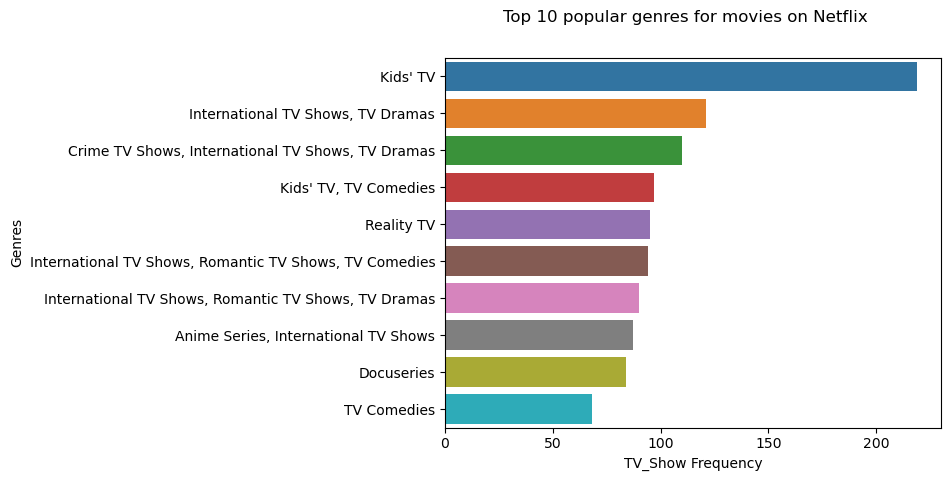

In [32]:
sns.barplot(x=popular_series_genre.values, y=popular_series_genre.index)
plt.ylabel("Genres")
plt.xlabel("TV_Show Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

### 10. Top 10 Directors with most movies and TV shows

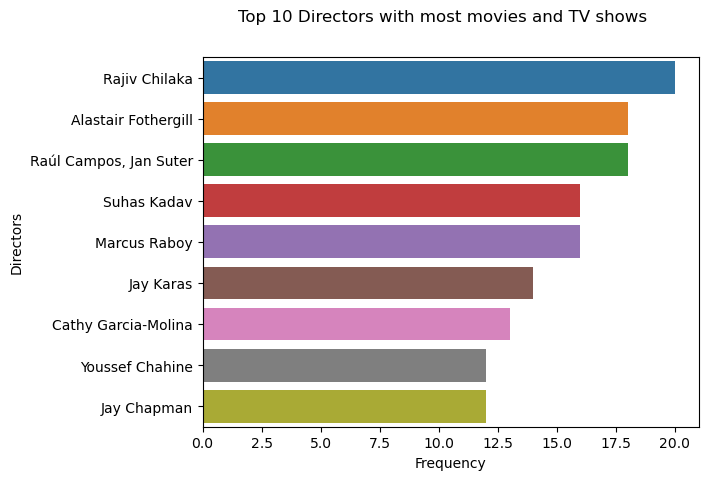

In [39]:
directors=df['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:10]

sns.barplot(y=directors['director'], x=directors['count'])
plt.ylabel("Directors")
plt.xlabel("Frequency")
plt.suptitle("Top 10 Directors with most movies and TV shows")
plt.show()